In [48]:
import scripts.framework as fr
import scripts.headrpp_alg as headrpp
import scripts.dijkstra_alg as dijkstra
import scripts.nsga2 as nsga2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Variables
start_node_sp = 22
end_node_sp = 434
start_node_nl = 0
end_node_nl = 154

In [ ]:
repr_sp = fr.Representation("./data/nodes_sp.csv", "./data/edges_sp.csv", maptype="sp")
repr_sp.plot_map(plot_nodes=True)

repr_nl = fr.Representation("./data/nodes_nl.csv", "./data/edges_nl.csv", maptype="nl")
repr_nl.plot_map(plot_nodes=True)

In [ ]:
weights = [1, 0, 0, 0] # distance, traffic, pollution, hotspots

alg = dijkstra.DIJKSTRA(repr_sp, start_node_sp, end_node_sp)
route, cost = alg.run_algorithm(show_results=True, weights=weights)

alg = dijkstra.DIJKSTRA(repr_nl, start_node_nl, end_node_nl)
route, cost = alg.run_algorithm(show_results=True, weights=weights)

In [ ]:
nr_generations = 200
weights = [1/4, 1/4, 1/4, 1/4] # distance, traffic, pollution, hotspots

pop_size_sg = 50
alg = headrpp.HEADRPP(repr_sp, nr_generations, start_node_sp, end_node_sp, pop_size_sg, weights, 0.8, 0.3, 2)
results = alg.run_algorithm(show_results=False, save_name="images/singapore")
repr_sp.plot_map(results[1], plot_nodes=False, show_axes=False)

pop_size_nl = 10
alg = headrpp.HEADRPP(repr_nl, nr_generations, start_node_nl, end_node_nl, pop_size_nl, weights, 0.8, 0.3, 2)
results = alg.run_algorithm(show_results=False, save_name="images/netherlands")
repr_nl.plot_map(results[1], plot_nodes=False, show_axes=False)

In [ ]:
nr_generations = 200
weights = [1/4, 1/4, 1/4, 1/4] # distance, traffic, pollution, hotspots

pop_size_sg = 50
alg = nsga2.NSGA2(repr_sp, nr_generations, start_node_sp, end_node_sp, pop_size_sg, weights, 0.8, 0.3, 2)
results = alg.run_algorithm(show_results=False, save_name="images/singapore")
repr_sp.plot_map(results[1], plot_nodes=False, show_axes=False)

pop_size_nl = 10
alg = nsga2.NSGA2(repr_nl, nr_generations, start_node_nl, end_node_nl, pop_size_nl, weights, 0.8, 0.3, 2)
results = alg.run_algorithm(show_results=False, save_name="images/netherlands")
repr_nl.plot_map(results[1], plot_nodes=False, show_axes=False)

In [ ]:
from scripts.comparator import Comparator

# Variables
pop_size_sp = 50
pop_size_nl = 10
nr_gen_headrpp = 200
nr_gen_nsga2 = 200
weights = [1/4, 1/4, 1/4, 1/4]
p_crossover = 0.8
p_mutation = 0.3
group_size = 2

comp = Comparator(pop_size_sp, pop_size_nl, nr_gen_headrpp, nr_gen_nsga2, weights, p_crossover, p_mutation, group_size)

# Start and end nodes
start_node_sp = 22
end_node_sp = 434
start_node_nl = 0
end_node_nl = 154
nr_runs = 3
comp.run_comparison(nr_runs, start_node_sp, end_node_sp, start_node_nl, end_node_nl)

# Single objective comparison HEADRPP, NSGA-II and Dijkstra

Make results of different algorithms in one plot + Performance of HEADRPP vs NSGA-II vs Dijkstra when only considering distance/pollution/traffic/hotspots (look at best total distance at end of generation to compare with dijkstra) (hotspots not dijkstra: explain why, but compare for other algorithms)

In [ ]:
def calc_polution(route):
    total_polution = 0
    for i in range(len(route)-1):
        total_polution += repr_sp.nodes[route[i]].pollution
    return total_polution

def calc_traffic(route):
    total_traffic = 0
    for i in range(len(route)-1):
        total_traffic += repr_sp.nodes[route[i]].traffic
    return total_traffic

def calc_distance(route):
    total_distance = 0
    for i in range(len(route)-1):
        total_distance += repr_sp.nodes[route[i]].distance
    return total_distance

def calc_hotspots(route):
    total_hotspots = 0
    for i in range(len(route)-1):
        total_hotspots += repr_sp.nodes[route[i]].hotspots
    return total_hotspots

In [ ]:
# Variables
pop_size_sp = 50
pop_size_nl = 10
nr_gen_headrpp = 200
nr_gen_nsga2 = 200
p_crossover = 0.8
p_mutation = 0.3
group_size = 2

# Start and end nodes
start_node_sp = 22
end_node_sp = 434
start_node_nl = 0
end_node_nl = 154
nr_runs = 10

total_best_nsga2 = 0
total_best_headrpp = 0
total_best_dijkstra = 0

dijk = dijkstra.DIJKSTRA(repr_sp, start_node_sp, end_node_sp)

weight_combinations = [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]
weight_names = ["distance", "traffic", "pollution", "hotspots"]
for i, weights in enumerate(weight_combinations):
    nsga = nsga2.NSGA2(repr_sp, nr_gen_nsga2, start_node_sp, end_node_sp, pop_size_sp, weights, p_crossover, p_mutation, group_size)
    head= headrpp.HEADRPP(repr_sp, nr_gen_headrpp, start_node_sp, end_node_sp, pop_size_sp, weights, p_crossover, p_mutation, group_size)
    for j in range(nr_runs):
        total_best_nsga2 +=  nsga.run_algorithm(show_results=False)[2*i+6][-1]
        total_best_headrpp += head.run_algorithm(show_results=False)[2*i+6][-1]
    avg_best_nsga2 = total_best_nsga2 / nr_runs
    avg_best_headrpp = total_best_headrpp / nr_runs
    if i == 0:
        avg_best_dijkstra = dijk.run_algorithm(show_results=False, weights=weights)[1]
    elif i == 1:
        best_route_dijkstra, _ = dijk.run_algorithm(show_results=False, weights=weights)
        avg_best_dijkstra = calc_traffic(best_route_dijkstra)
    elif i == 2:
        best_route_dijkstra, _ = dijk.run_algorithm(show_results=False, weights=weights)
        avg_best_dijkstra = calc_polution(best_route_dijkstra)
    elif i == 3:
        best_route_dijkstra, _ = dijk.run_algorithm(show_results=False, weights=weights)
        avg_best_dijkstra = calc_hotspots(best_route_dijkstra)

    # Plotting results
    fig, ax = plt.subplots()
    
    # Scatter plot with 'X' markers
    ax.scatter(["NSGA-II"], [avg_best_nsga2], color='red', marker='X', s=100, label='NSGA-II')
    ax.scatter(["HEADRPP"], [avg_best_headrpp], color='blue', marker='X', s=100, label='HEADRPP')
    ax.scatter(["Dijkstra"], [avg_best_dijkstra], color='green', marker='X', s=100, label='Dijkstra')

    # Adding annotations to show the exact values
    ax.annotate(f"{avg_best_nsga2:.2f}", xy=("NSGA-II", avg_best_nsga2), xytext=(-10, 10), textcoords='offset points', ha='center', color='red')
    ax.annotate(f"{avg_best_headrpp:.2f}", xy=("HEADRPP", avg_best_headrpp), xytext=(-10, 10), textcoords='offset points', ha='center', color='blue')
    ax.annotate(f"{avg_best_dijkstra:.2f}", xy=("Dijkstra", avg_best_dijkstra), xytext=(-10, 10), textcoords='offset points', ha='center', color='green')
    
    ax.set_ylabel("Average cost")
    ax.set_xlabel("Algorithm")
    ax.set_title(f"Average cost of the best route for {weight_names[i]}")
    
    ax.legend()
    # Saving the plot
    save_name = "images/avg_best"
    ylabel = ax.get_ylabel()
    alg_name = weight_names[i]
    plt.savefig(
        save_name
        + f"_{alg_name.lower()}_{ylabel.split('(')[0][:-1].replace(' ', '_').lower()}.png"
    )
    plt.show()


Running HEADRPP: 100%|██████████| 200/200 [00:03<00:00, 57.64it/s]


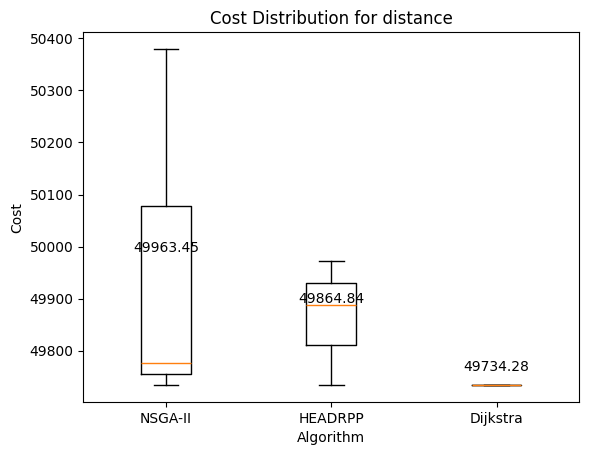

Running HEADRPP: 100%|██████████| 200/200 [00:06<00:00, 32.18it/s]


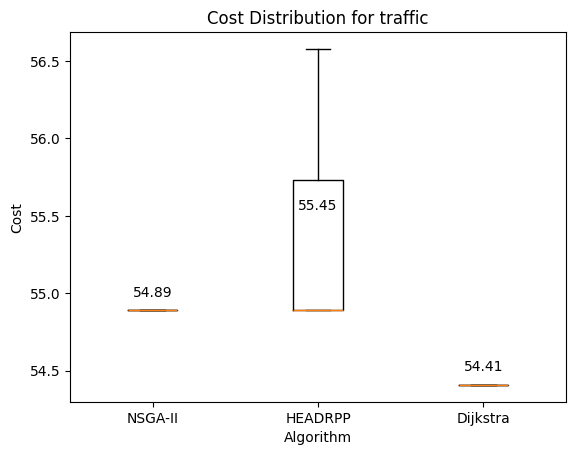

Running HEADRPP: 100%|██████████| 200/200 [00:03<00:00, 57.51it/s]


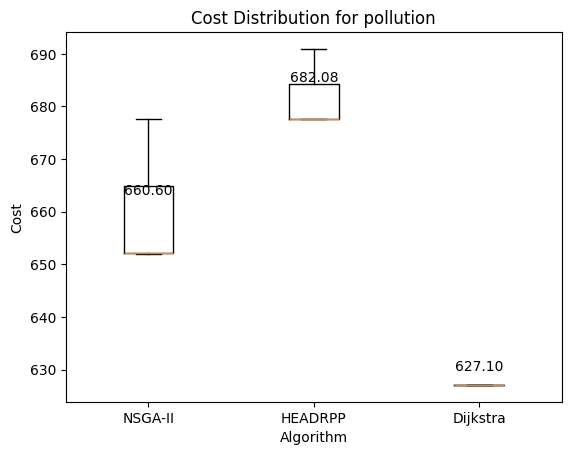

Running HEADRPP: 100%|██████████| 200/200 [00:05<00:00, 34.14it/s]


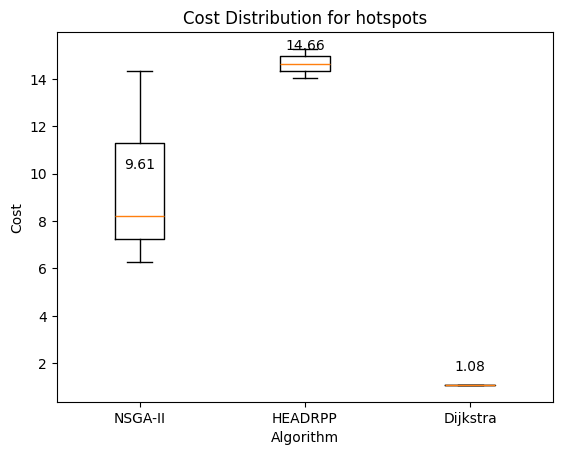

In [51]:
# Variables
pop_size_sp = 50
pop_size_nl = 10
nr_gen_headrpp = 200
nr_gen_nsga2 = 200
p_crossover = 0.8
p_mutation = 0.3
group_size = 2

# Start and end nodes
start_node_sp = 22
end_node_sp = 434
start_node_nl = 0
end_node_nl = 154
nr_runs = 3

# Dijkstra initialization
dijk = dijkstra.DIJKSTRA(repr_sp, start_node_sp, end_node_sp)

weight_combinations = [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]
weight_names = ["distance", "traffic", "pollution", "hotspots"]

for i, weights in enumerate(weight_combinations):
    nsga_costs = []
    headrpp_costs = []
    
    nsga = nsga2.NSGA2(repr_sp, nr_gen_nsga2, start_node_sp, end_node_sp, pop_size_sp, weights, p_crossover, p_mutation, group_size)
    head = headrpp.HEADRPP(repr_sp, nr_gen_headrpp, start_node_sp, end_node_sp, pop_size_sp, weights, p_crossover, p_mutation, group_size)
    
    for j in range(nr_runs):
        nsga_costs.append(nsga.run_algorithm(show_results=False)[2*i+6][-1])
        headrpp_costs.append(head.run_algorithm(show_results=False)[2*i+6][-1])
        
    best_route_dijkstra, avg_best_dijkstra = dijk.run_algorithm(show_results=False, weights=weights)
    if i == 0:
        # Nothing to do
        pass
    elif i == 1:
        avg_best_dijkstra = calc_traffic(best_route_dijkstra)
    elif i == 2:
        avg_best_dijkstra = calc_polution(best_route_dijkstra)
    elif i == 3:
        avg_best_dijkstra = calc_hotspots(best_route_dijkstra)
    
    # Add Dijkstra costs for nr_runs times to match the length of nsga_costs and headrpp_costs
    dijkstra_costs = [avg_best_dijkstra] * nr_runs
    
    # Plotting results
    fig, ax = plt.subplots()
    
    # Box plot
    data = [nsga_costs, headrpp_costs, dijkstra_costs]
    ax.boxplot(data, labels=["NSGA-II", "HEADRPP", "Dijkstra"], showmeans=False)
    
    ax.set_ylabel("Cost")
    ax.set_xlabel("Algorithm")
    ax.set_title(f"Cost Distribution for {weight_names[i]}")
    
    # Saving the plot
    save_name = "images/avg_best"
    alg_name = weight_names[i]
    plt.savefig(
        save_name
        + f"_{alg_name.lower()}_{ax.get_ylabel().split('(')[0][:-1].replace(' ', '_').lower()}.png"
    )
    plt.show()